In [94]:
import pandas as pd

In [95]:
df = pd.read_csv('./data/pm25_pm10_merged_wind.csv')
df['Date'] = pd.to_datetime(df['Date'])
    # 2015년 ~ 2018년 데이터 삭제
df = df[df['Date'].dt.year >= 2019]
df

,Date,City,Longitude,Latitude,PM2.5 (µg/m³),PM10 (µg/m³),Wind Speed (m/s),Wind Direction (degrees)
43344,2019-01-01,Seoul,126.9780,37.5665,49.200921,0.000000,2.460618,155.628492
43345,2019-01-01,Tokyo,139.6917,35.6895,26.668889,0.000000,0.047116,286.176144
43346,2019-01-01,Beijing,116.4074,39.9042,210.805339,0.000000,1.508064,135.351983
43347,2019-01-01,Delhi,77.1025,28.7041,286.576267,0.000000,0.304683,74.114247
43348,2019-01-01,Bangkok,100.5018,13.7563,30.368163,0.000000,2.382204,67.178274
...,...,...,...,...,...,...,...,...
85054,2023-03-31,Kathmandu,85.3240,27.7172,40.126160,57.990079,0.096088,211.971507
85055,2023-03-31,Yangon,96.1951,16.8409,26.602210,40.808040,1.840198,191.547879
85056,2023-03-31,Guwahati,91.7362,26.1445,51.846534,75.186961,0.874823,29.465338
85057,2023-03-31,Ulaanbaatar,106.9057,47.8864,6.770384,15.529293,2.389273,139.246956


In [96]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드
data = pd.read_csv("./data/pm25_pm10_merged.csv")  # 파일로 저장 후 로드 가정
data['Date'] = pd.to_datetime(data['Date'])

# 피벗 테이블 생성 (PM2.5)
pivot_data = data.pivot(index='Date', columns='City', values='PM2.5 (µg/m³)').reset_index()
pivot_data = pivot_data.fillna(0)  # 혹시 결측값이 있으면 0으로 채움

Correlation Matrix (with zeros):
City      Beijing     Seoul     Tokyo     Delhi   Bangkok
City                                                     
Beijing  1.000000  0.696379  0.485413  0.731261  0.476041
Seoul    0.696379  1.000000  0.450368  0.669119  0.251459
Tokyo    0.485413  0.450368  1.000000  0.445281  0.327660
Delhi    0.731261  0.669119  0.445281  1.000000  0.439126
Bangkok  0.476041  0.251459  0.327660  0.439126  1.000000


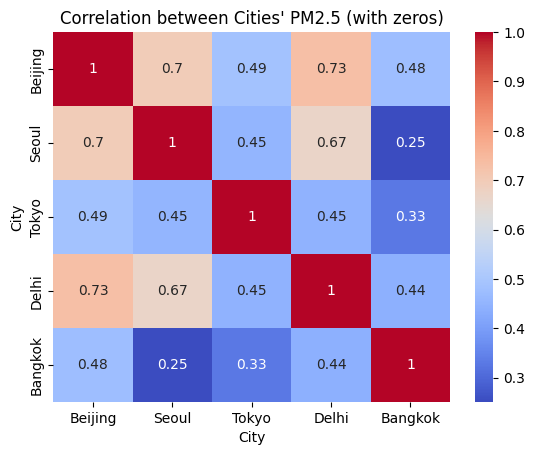

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
correlation = pivot_data[['Beijing', 'Seoul', 'Tokyo', 'Delhi', 'Bangkok']].corr()
print("Correlation Matrix (with zeros):")
print(correlation)

# 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Cities' PM2.5 (with zeros)")
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 독립 변수(X)와 종속 변수(y) 설정
X = pivot_data[['Beijing']]  # 베이징 PM2.5
y = pivot_data[['Seoul', 'Tokyo', 'Delhi', 'Bangkok']]  # 다른 도시 PM2.5

# 데이터 분할 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error for each city (Seoul, Tokyo, Delhi, Bangkok):", mse)

Mean Squared Error for each city (Seoul, Tokyo, Delhi, Bangkok): [1502.76975962  150.2671935  5392.8436834  1603.63114938]


In [99]:
def predict_pm25(beijing_pm25):
    input_value = [[beijing_pm25]]
    predicted_pm25 = model.predict(input_value)
    cities = ['Seoul', 'Tokyo', 'Delhi', 'Bangkok']
    return dict(zip(cities, predicted_pm25[0]))

# 예시: 베이징 PM2.5 = 100 µg/m³
result = predict_pm25(100)
print("Predicted PM2.5 for other cities when Beijing PM2.5 = 100 µg/m³:")
for city, value in result.items():
    print(f"{city}: {value:.2f} µg/m³")

Predicted PM2.5 for other cities when Beijing PM2.5 = 100 µg/m³:
Seoul: 49.06 µg/m³
Tokyo: 18.55 µg/m³
Delhi: 106.75 µg/m³
Bangkok: 36.06 µg/m³


/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/2459457226.py:44: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/2459457226.py:44: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/2459457226.py:44: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/2459457226.py:44: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/2459457226.py:44: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/2459457226.py:44: User

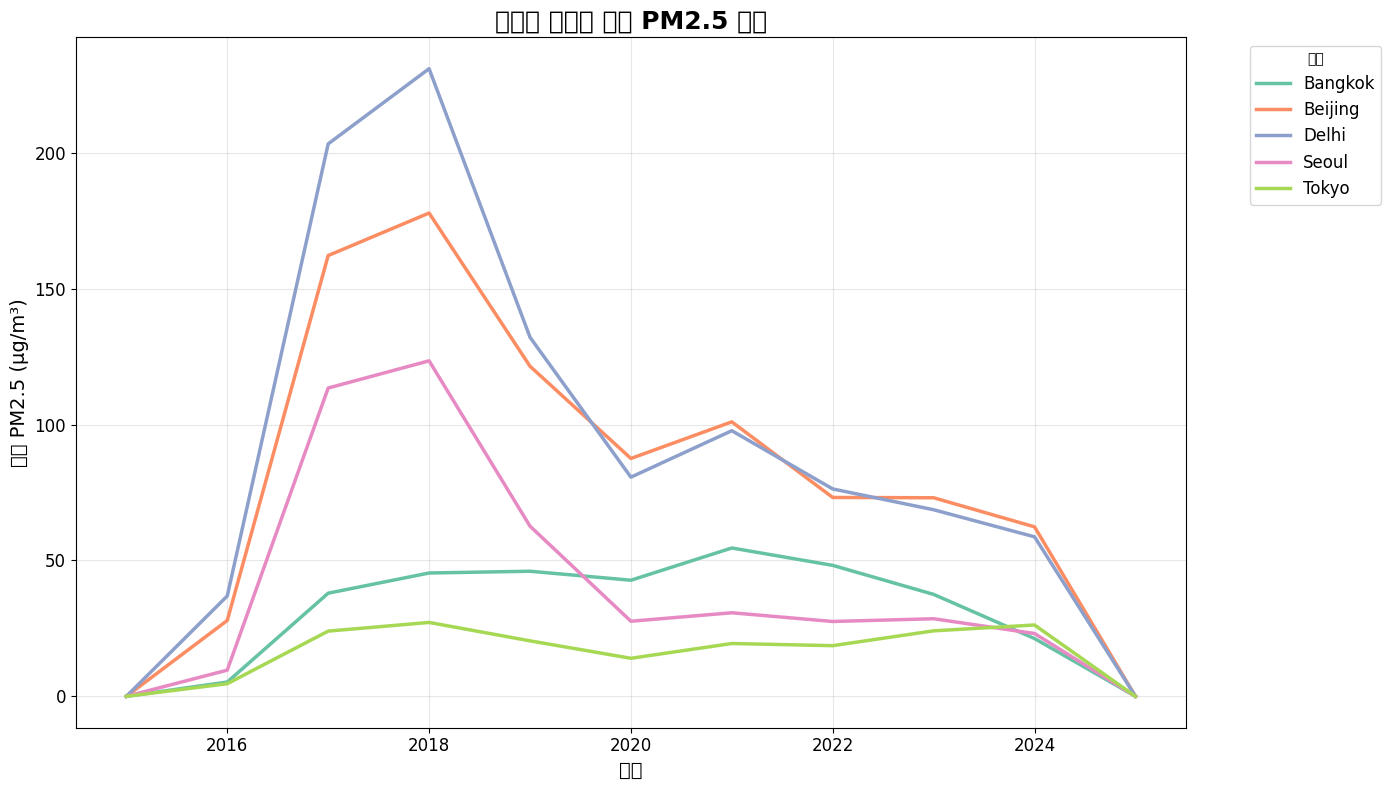

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib

# font_path = 'C:\Windows\Fonts\gulim.ttc'
# font = fm.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family=font)

# CSV 파일 읽기
data = pd.read_csv('./data/pm25_pm10_merged.csv')


# 날짜를 datetime 형식으로 변환 및 연도 추출
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# 도시별 연도별 PM2.5 평균 계산
year_city_avg = data.groupby(['Year', 'City'], as_index=False)['PM2.5 (µg/m³)'].mean()

# 그래프 그리기
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Year', 
    y='PM2.5 (µg/m³)', 
    hue='City', 
    data=year_city_avg, 
    palette='Set2', 
    linewidth=2.5
)

# 그래프 설정
plt.title('도시별 연도별 평균 PM2.5 농도', fontsize=18, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('평균 PM2.5 (µg/m³)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='도시', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(alpha=0.3)

# 그래프 저장 및 출력
plt.tight_layout()
plt.show()


/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/710417877.py:36: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/710417877.py:36: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/710417877.py:36: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/710417877.py:36: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/710417877.py:36: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/710417877.py:36: UserWarnin

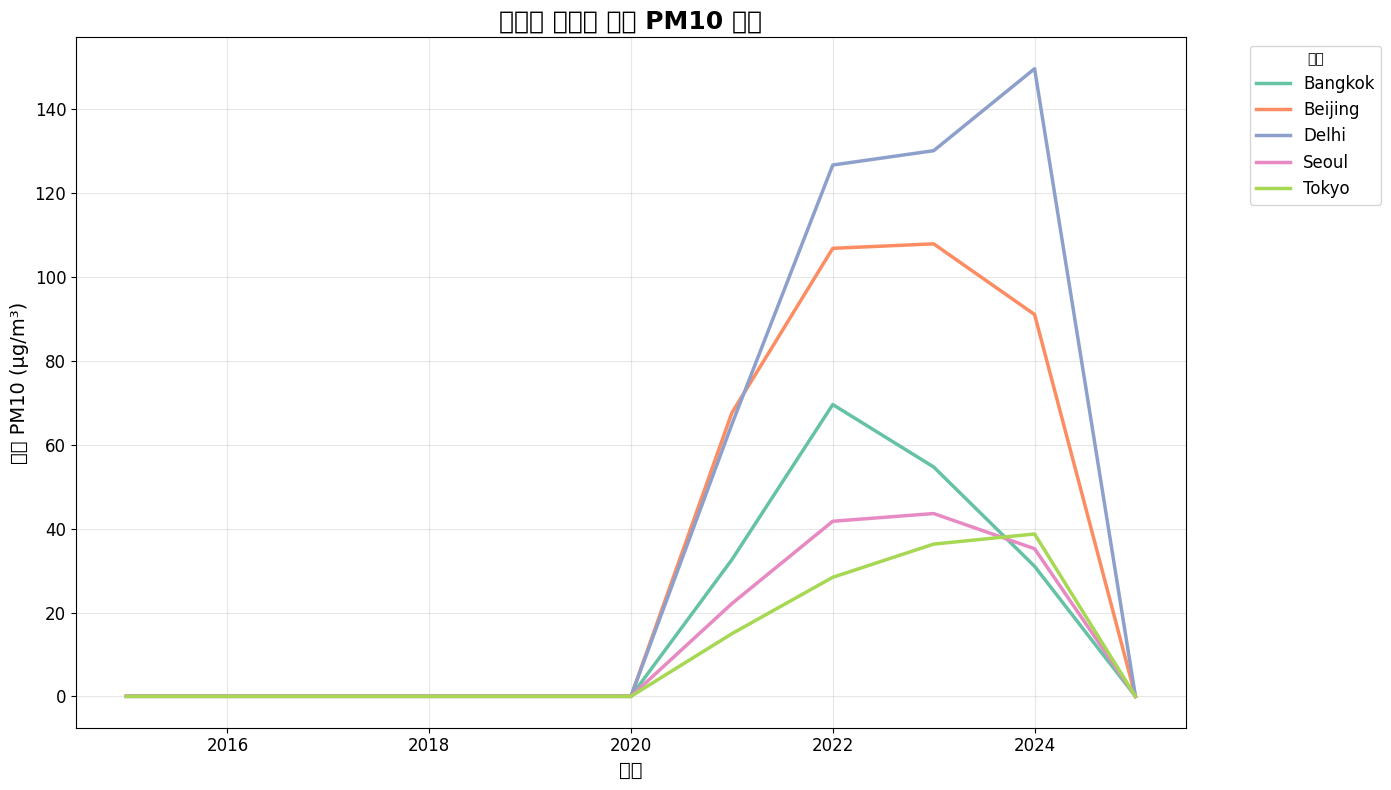

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 읽기
data = pd.read_csv('./data/pm25_pm10_merged.csv')

# 날짜를 datetime 형식으로 변환 및 연도 추출
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# 도시별 연도별 PM10 평균 계산
year_city_avg_pm10 = data.groupby(['Year', 'City'], as_index=False)['PM10 (µg/m³)'].mean()

# 그래프 그리기
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Year', 
    y='PM10 (µg/m³)', 
    hue='City', 
    data=year_city_avg_pm10, 
    palette='Set2', 
    linewidth=2.5
)

# 그래프 설정
plt.title('도시별 연도별 평균 PM10 농도', fontsize=18, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('평균 PM10 (µg/m³)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='도시', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(alpha=0.3)

# 그래프 저장 및 출력
plt.tight_layout()
plt.show()


In [102]:
import pandas as pd
from typing import List, Union

# 이상치 제거 함수 정의
def fillna(df, columns, default=0):
    for column in columns:
        df[column] = df[column].fillna(default)
    return df

def dropna(df, column_list):
    df = df.dropna(subset=column_list, axis=0)
    return df

def change_type(df, columns, dtype):
    for column in columns:
        df[column] = df[column].astype(dtype)
    return df

def cleaned_data(df: pd.DataFrame, columns: List[str], value: Union[int, float, List[Union[int, float]]], compare_type: str) -> pd.DataFrame:
    if not columns:
        raise ValueError("컬럼 리스트가 비어있습니다.")
    
    if compare_type == "over":
        if not isinstance(value, (int, float)):
            raise TypeError("value가 숫자가 아닙니다.")
        for column in columns:
            df = df[df[column] < value]
    elif compare_type == "under":
        if not isinstance(value, (int, float)):
            raise TypeError("value가 숫자가 아닙니다.")
        for column in columns:
            df = df[df[column] > value]
    elif compare_type == "between":
        if not isinstance(value, (list, tuple)) or len(value) != 2:
            raise TypeError("value가 리스트 또는 튜플이 아니거나 길이가 2가 아닙니다.")
        lower, upper = value[0], value[1]
        for column in columns:
            df = df[(df[column] > lower) & (df[column] < upper)]
    else:
        raise ValueError(f"Invalid compare_type: {compare_type}. Use 'over', 'under', or 'between'")
    return df

# CSV 파일 읽기
data = pd.read_csv('./data/pm25_pm10_merged.csv')


# 데이터 전처리
data = fillna(data, ['PM2.5 (µg/m³)', 'PM10 (µg/m³)'], default=0)
data = dropna(data, ['PM2.5 (µg/m³)', 'PM10 (µg/m³)'])
data = change_type(data, ['PM2.5 (µg/m³)', 'PM10 (µg/m³)'], float)

# PM2.5와 PM10 값의 이상치 제거
data = cleaned_data(data, ['PM2.5 (µg/m³)'], [0, 150], compare_type="between")
data = cleaned_data(data, ['PM10 (µg/m³)'], [0, 100], compare_type="between")

# 결과 출력
print(data.head())


             Date     City  Longitude  Latitude  PM2.5 (µg/m³)  PM10 (µg/m³)
11830  2021-06-30    Seoul   126.9780   37.5665      37.672855     54.764968
11831  2021-06-30    Tokyo   139.6917   35.6895      15.619076     24.265603
11834  2021-06-30  Bangkok   100.5018   13.7563      13.648585     19.613616
11835  2021-07-01    Seoul   126.9780   37.5665      29.454363     42.682874
11836  2021-07-01    Tokyo   139.6917   35.6895      11.960434     18.084718


/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/3044515470.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year-Month'] = filtered_data['Year'].astype(str) + '-' + ((filtered_data['Month'] - 1) // 3 + 1).astype(str)
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/3044515470.py:44: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/3044515470.py:44: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_38060/3044515470.py:44: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missi

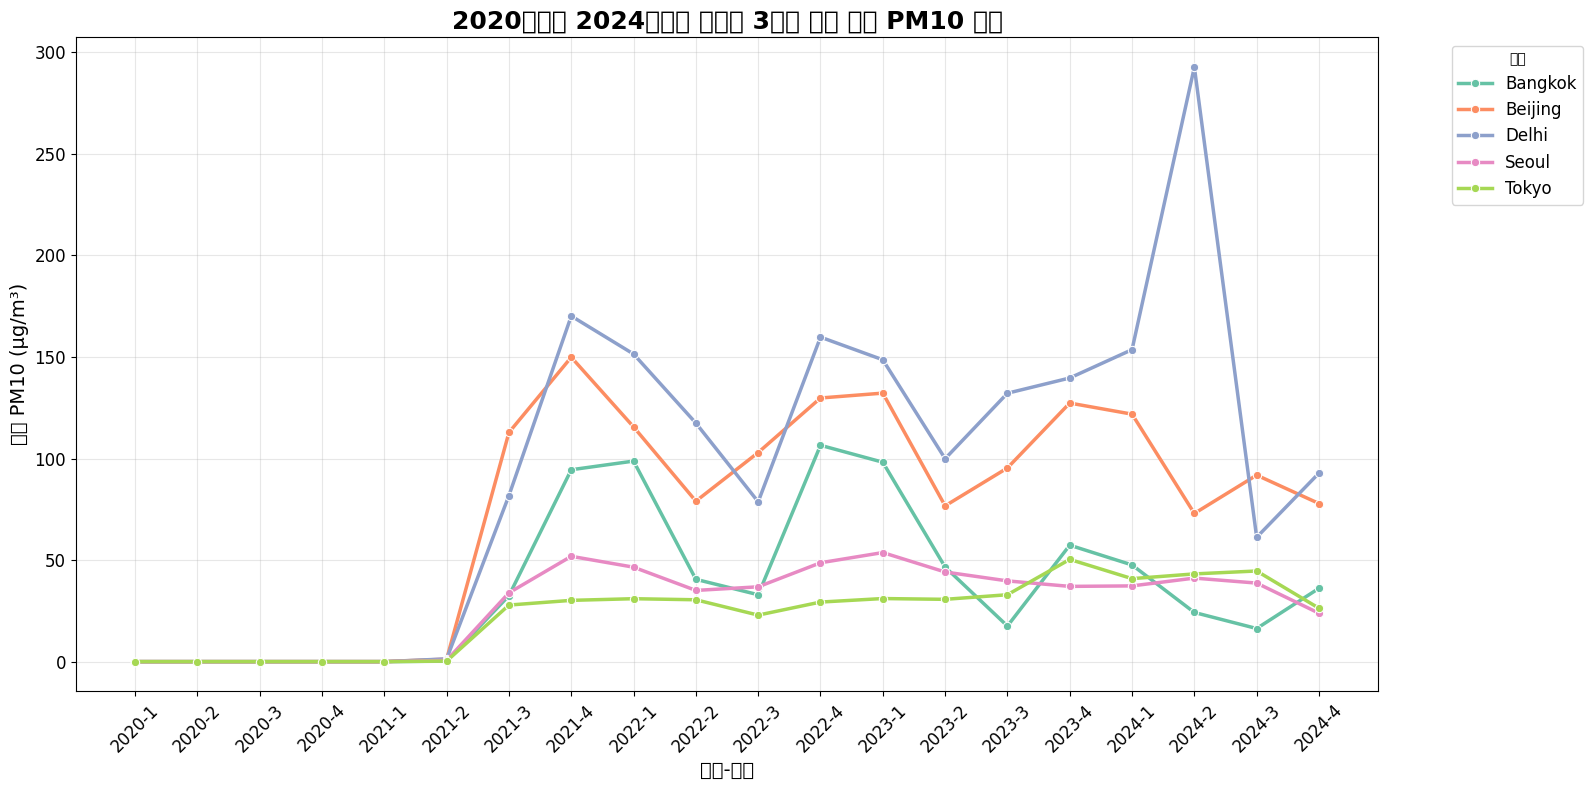

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 읽기
data = pd.read_csv('./data/pm25_pm10_merged.csv')

# 날짜를 datetime 형식으로 변환 및 연도, 월 추출
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# 2020년부터 2024년까지 데이터 필터링
filtered_data = data[(data['Year'] >= 2020) & (data['Year'] <= 2024)]

# 연도와 월을 결합하여 새로운 열 생성 (3개월 단위로 그룹화)
filtered_data['Year-Month'] = filtered_data['Year'].astype(str) + '-' + ((filtered_data['Month'] - 1) // 3 + 1).astype(str)

# 도시별 연도-3개월 단위 평균 PM10 계산
quarterly_city_avg_pm10 = filtered_data.groupby(['Year-Month', 'City'], as_index=False)['PM10 (µg/m³)'].mean()

# 그래프 그리기
plt.figure(figsize=(16, 8))
sns.lineplot(
    x='Year-Month', 
    y='PM10 (µg/m³)', 
    hue='City', 
    data=quarterly_city_avg_pm10, 
    palette='Set2', 
    linewidth=2.5,
    marker='o'
)

# 그래프 설정
plt.title('2020년부터 2024년까지 도시별 3개월 단위 평균 PM10 농도', fontsize=18, fontweight='bold')
plt.xlabel('연도-분기', fontsize=14)
plt.ylabel('평균 PM10 (µg/m³)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='도시', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(alpha=0.3)

# 그래프 저장 및 출력
plt.tight_layout()

plt.show()
